In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from PIL import Image

from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
#Only 1 play
week_1 = pd.read_csv('G:\\pycharm\\PyCharm Projects\\Data analysis\\HW\\data\\tracking_week_1.csv')
play_1 = week_1[(week_1['gameId'] == 2022090800) & (week_1['playId'] == 56)]

In [5]:
play_1

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2022090800,56,NaN,football,18,2022-09-08 20:24:06.900000,NaN,football,left,78.160004,36.650002,0.07,0.27,0.01,NaN,NaN,tackle
502,2022090800,56,NaN,football,19,2022-09-08 20:24:07.000000,NaN,football,left,78.230003,36.389999,0.05,0.18,0.27,NaN,NaN,NaN
503,2022090800,56,NaN,football,20,2022-09-08 20:24:07.099999,NaN,football,left,78.230003,36.389999,0.04,0.13,0.00,NaN,NaN,NaN
504,2022090800,56,NaN,football,21,2022-09-08 20:24:07.200000,NaN,football,left,78.220001,36.389999,0.02,0.09,0.00,NaN,NaN,NaN


In [6]:
print(play_1['frameId'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


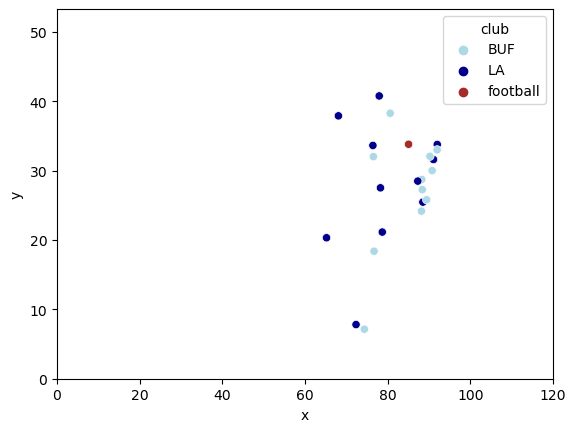

In [7]:
#1 Frame
temp = play_1[play_1['frameId'] == 1]
plot = sns.scatterplot(data=temp, x='x', y='y', hue='club', palette=['lightblue', 'darkblue', 'brown'])
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.show()

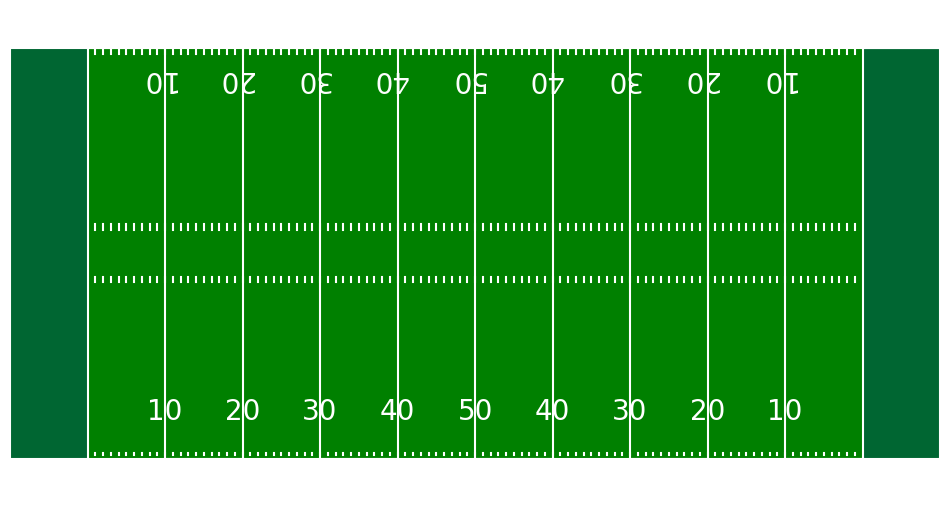

In [8]:
#Sourced from here: https://www.kaggle.com/code/robikscube/nfl-big-data-bowl-plotting-player-position
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='green',zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax
fig, ax = create_football_field()

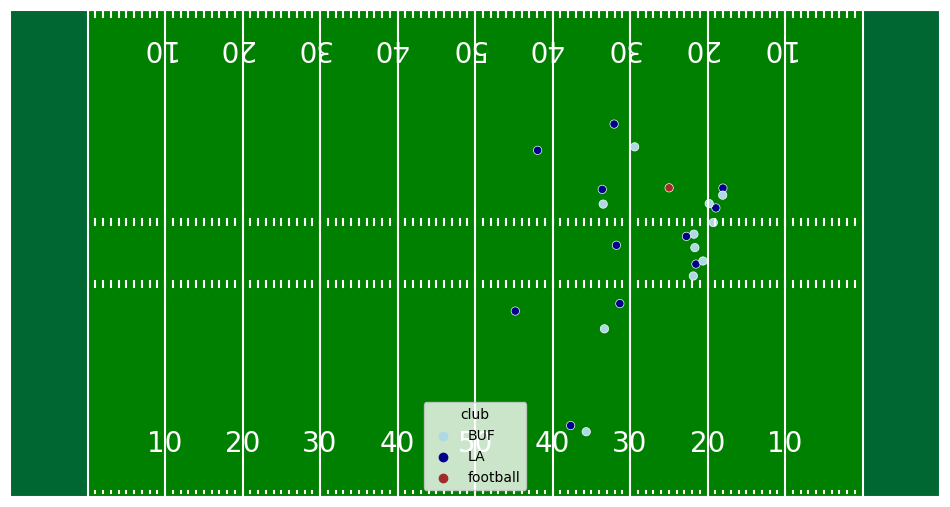

In [9]:
#Football Field
fig, ax = create_football_field()
plot = sns.scatterplot(data=temp, x='x', y='y', hue='club', palette=['lightblue', 'darkblue', 'brown'])
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.show()

In [12]:
#With Labels and Vectors
def frame(i, orient, metric):
    fig, ax = create_football_field()
    plot = sns.scatterplot(data=play_1[play_1['frameId'] == i], x='x', y='y', hue='club', palette=['lightblue', 'darkblue', 'brown'], legend=False)
    for index, row in play_1[play_1['frameId'] == i].iterrows():
        try:
            ax.text(row['x'], row['y'], int(row['jerseyNumber']), color='white')
            angle = math.radians(row[orient])
            x_length = row[metric] * math.cos(angle)
            y_length = row[metric] * math.sin(angle)
            ax.quiver(row['x'], row['y'], x_length, y_length, angles='xy', scale_units='xy',width=0.004, scale=1, alpha=0.5)
        except ValueError:
            continue
    plt.xlim(0, 120)
    plt.ylim(0, 53.3)
    plt.savefig(f'frame_{i}.png')
    plt.show()

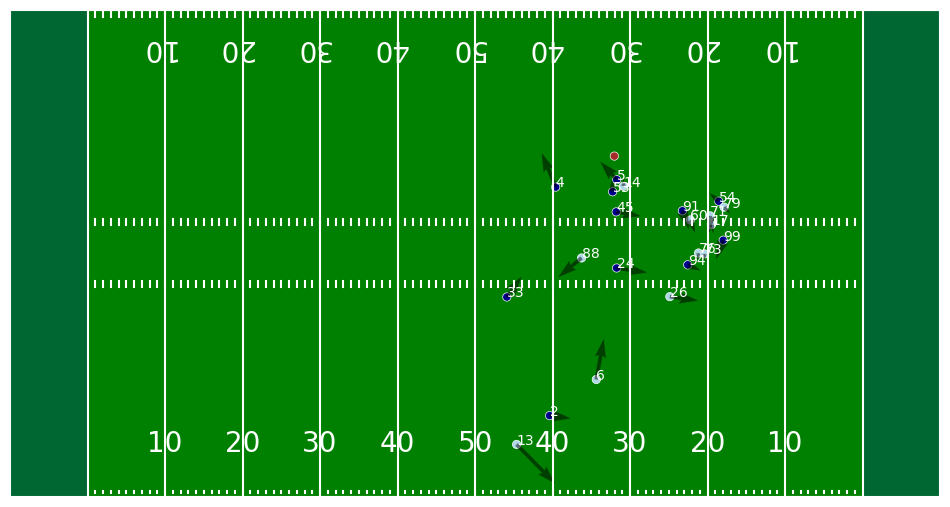

In [15]:
frame(13, 'o', 's')

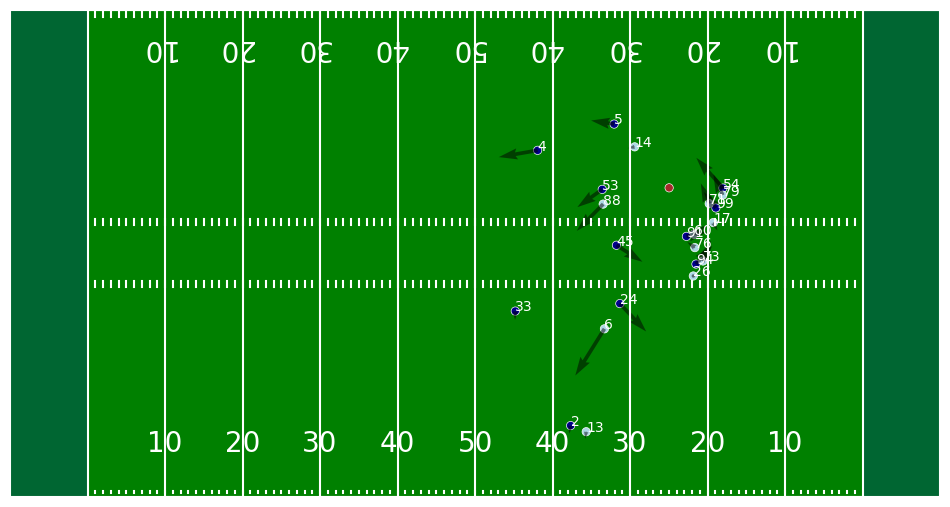

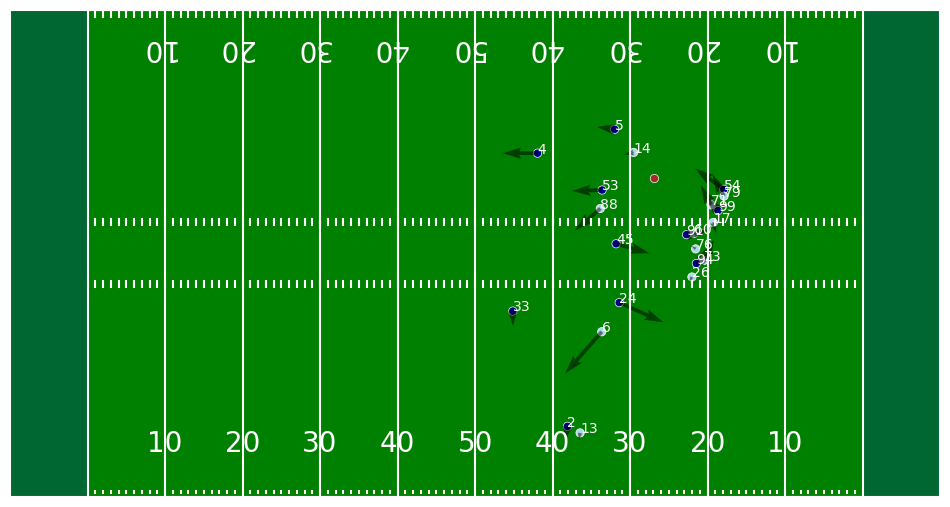

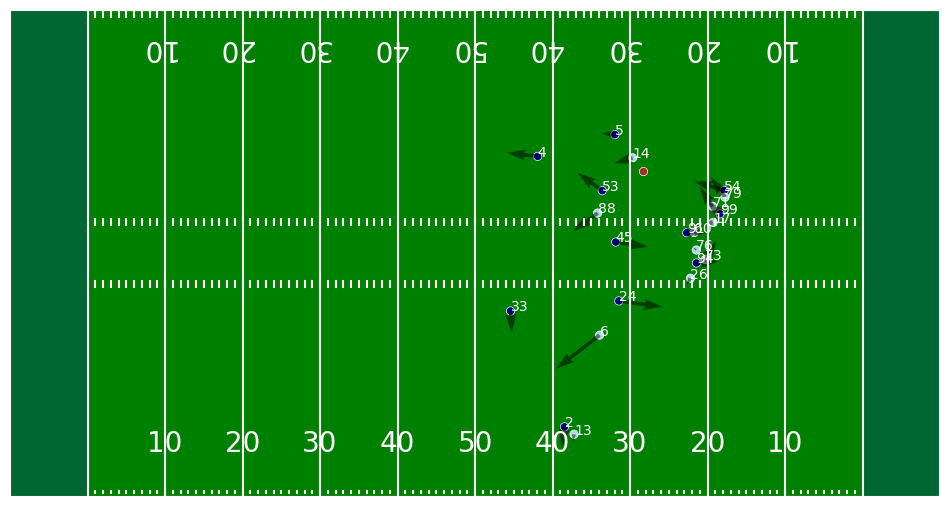

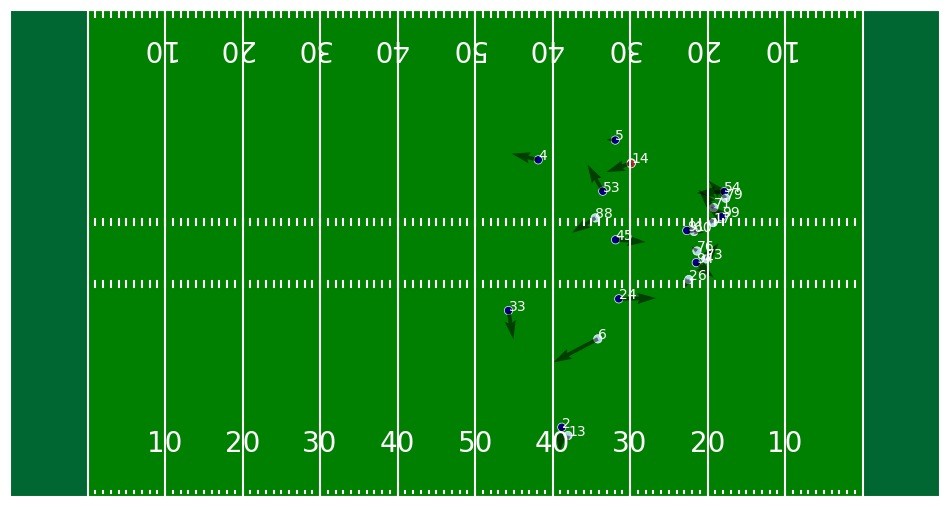

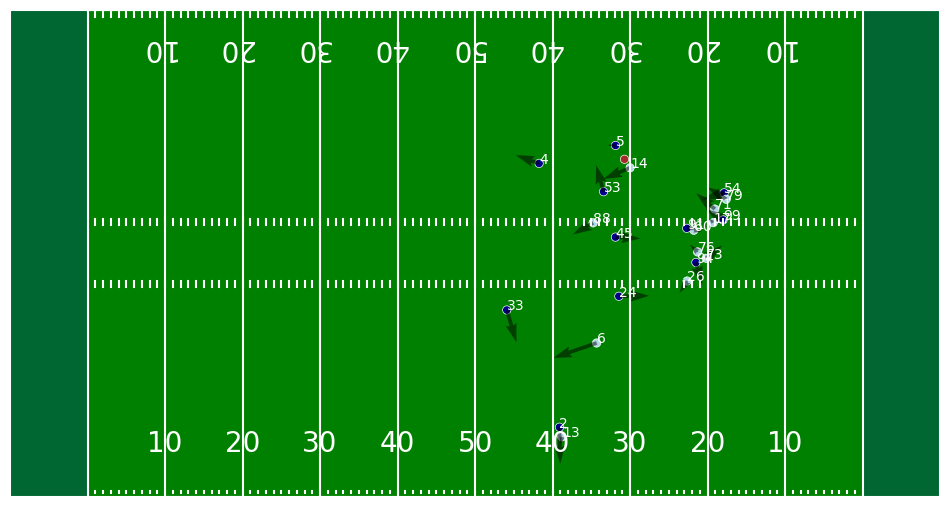

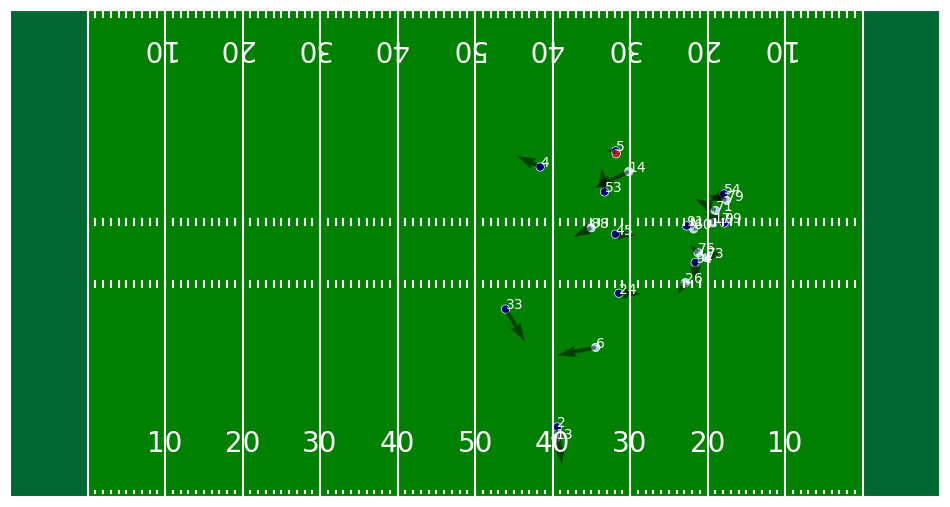

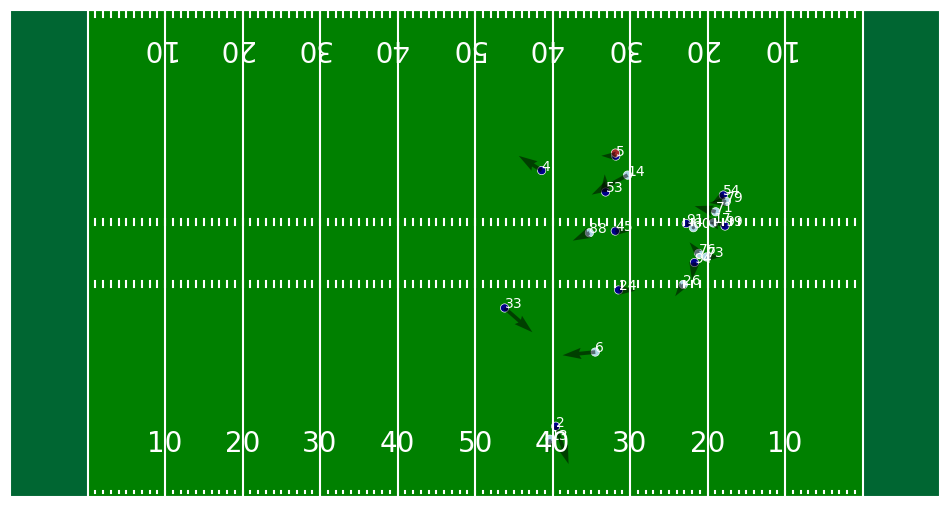

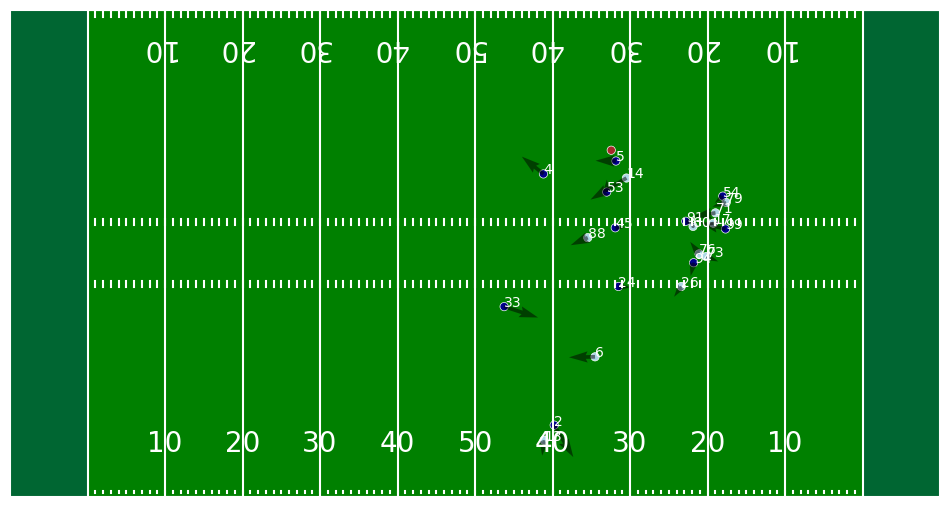

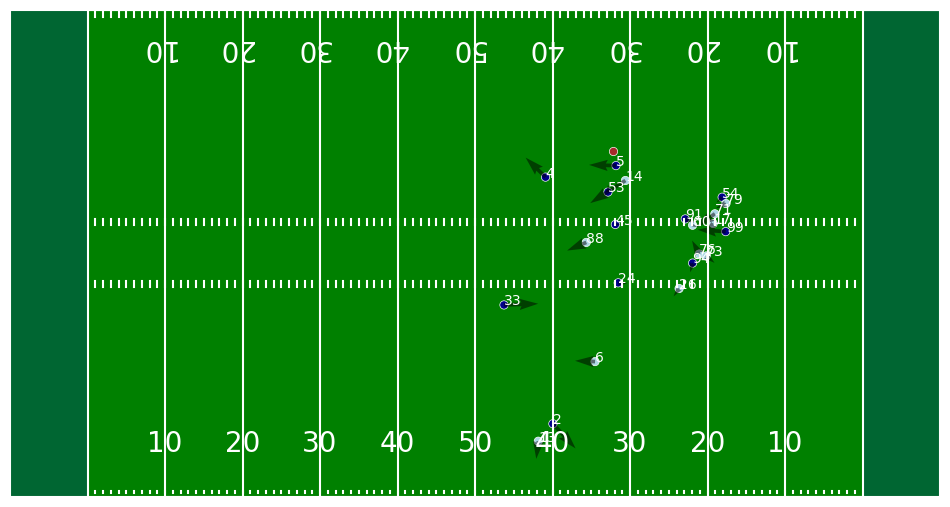

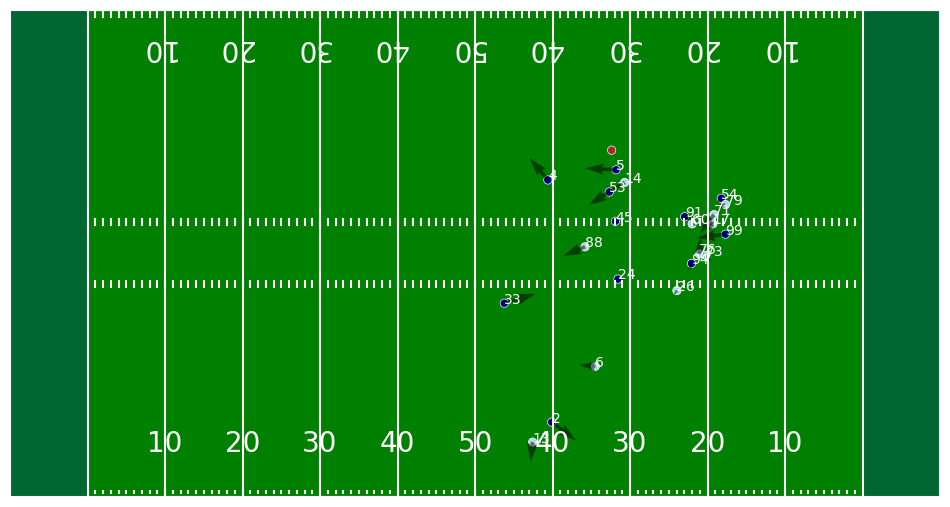

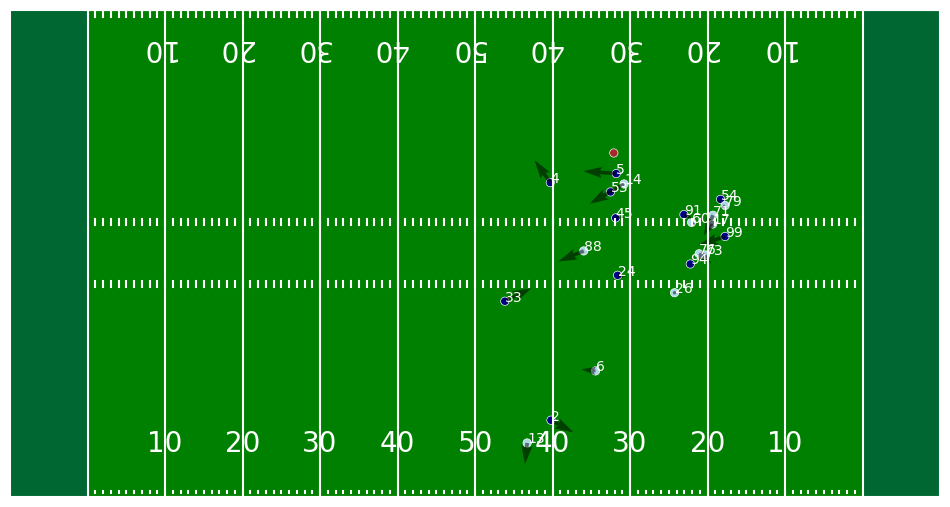

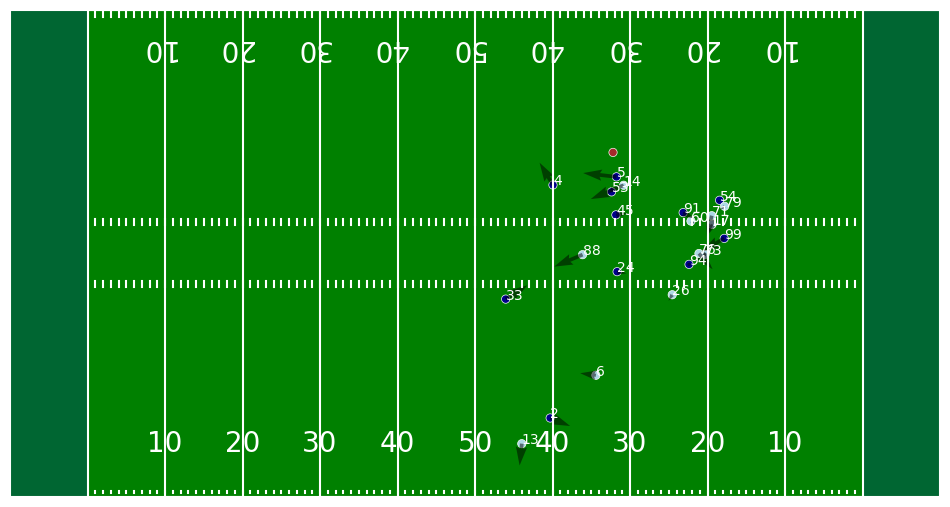

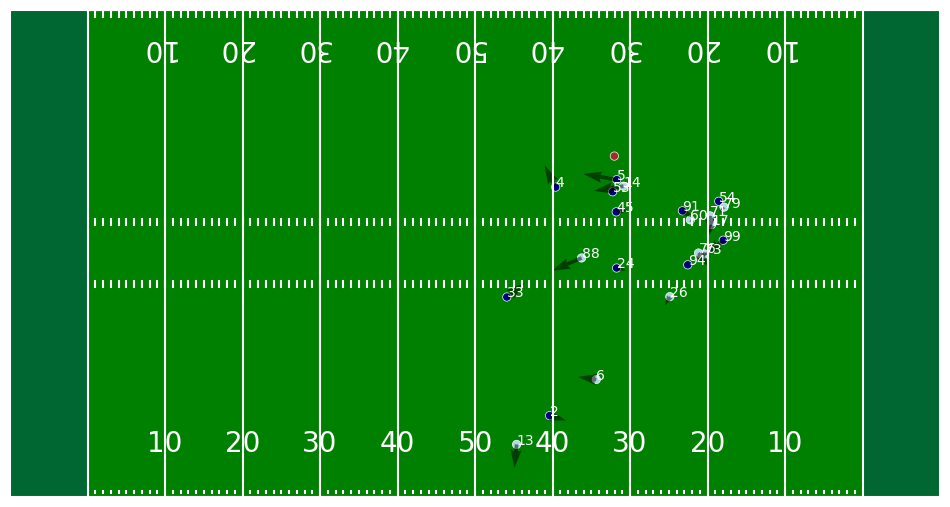

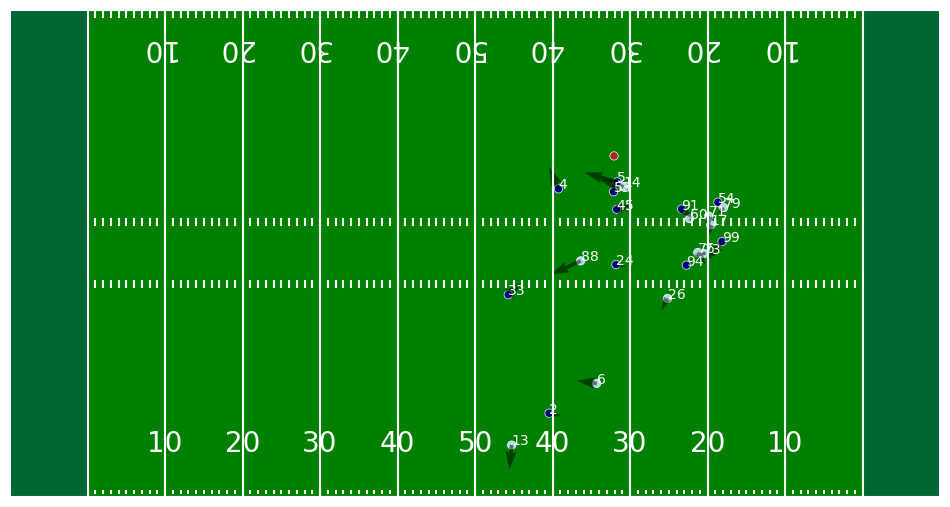

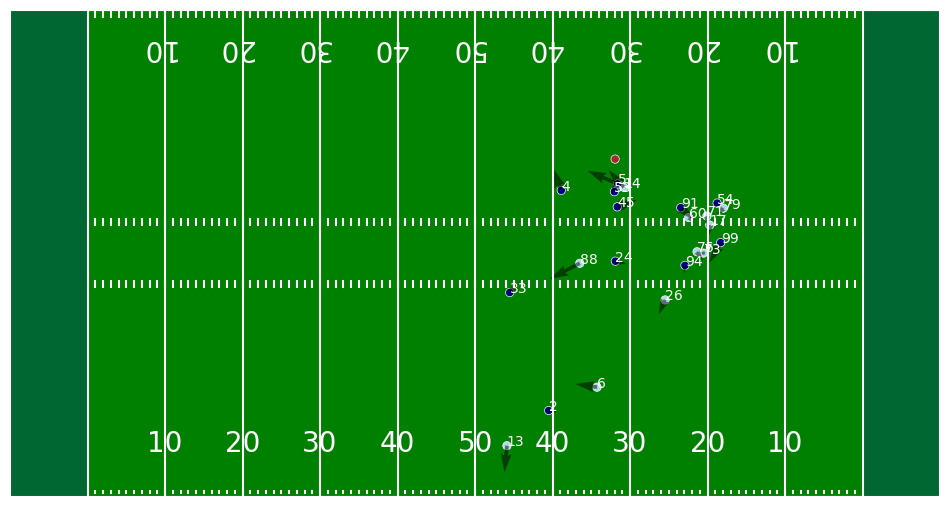

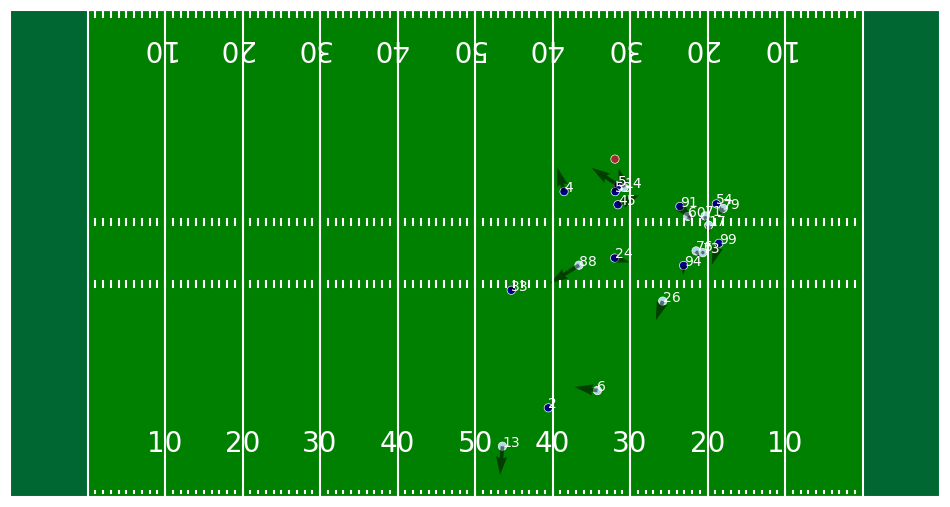

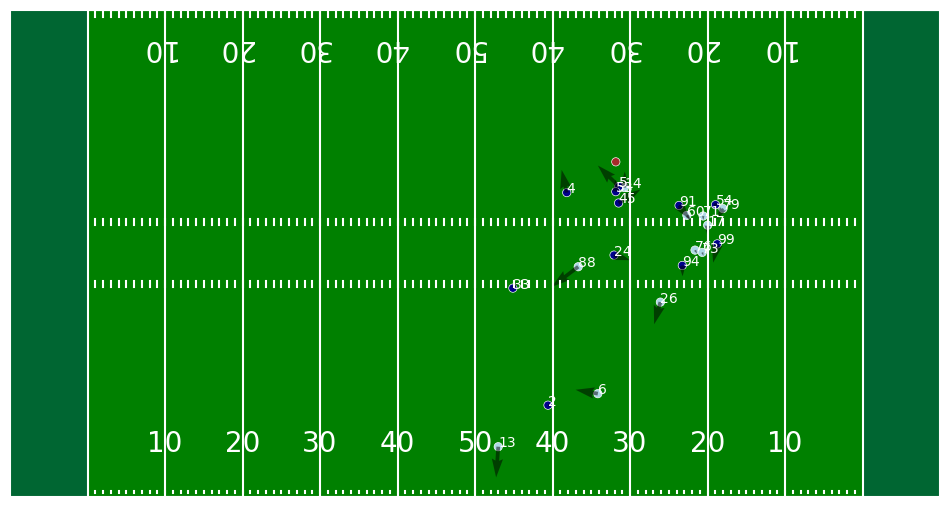

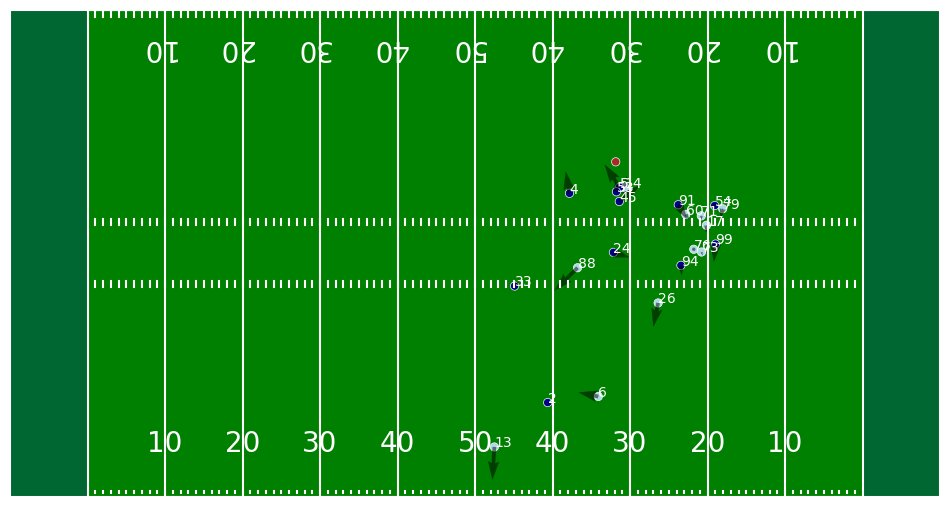

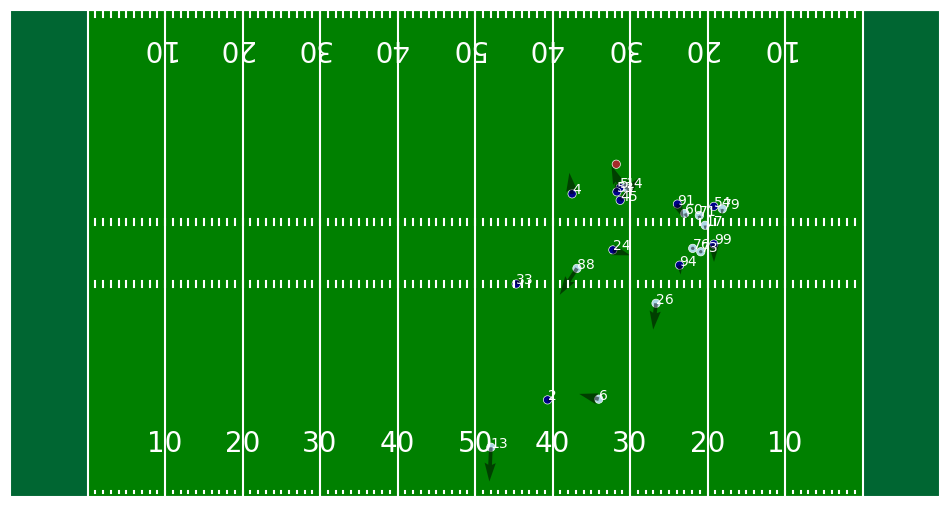

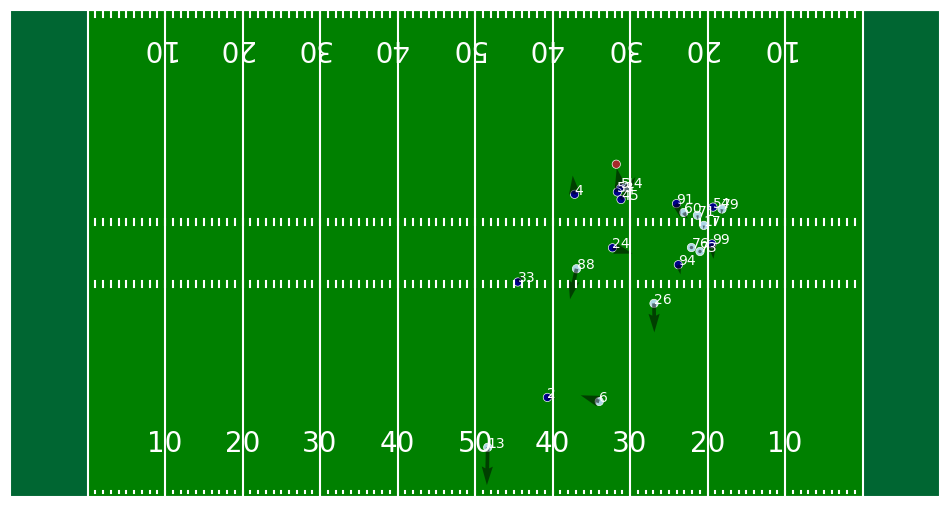

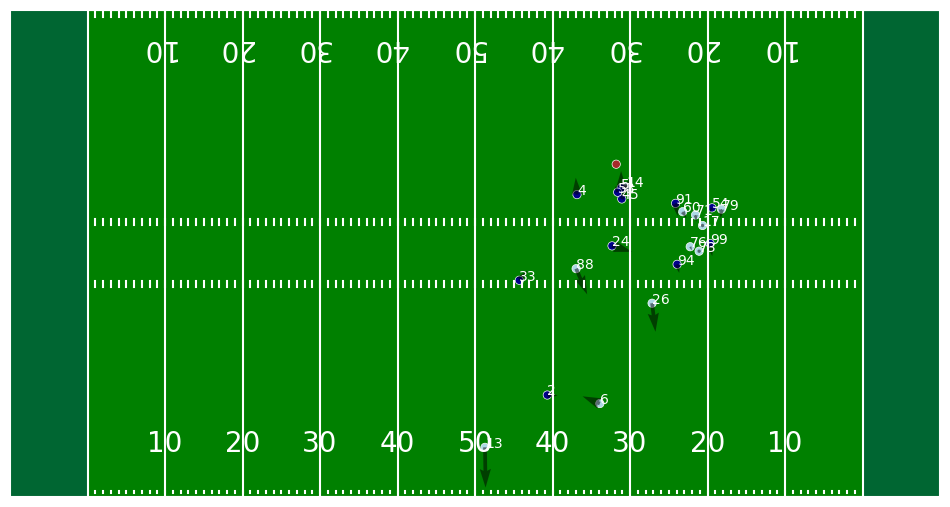

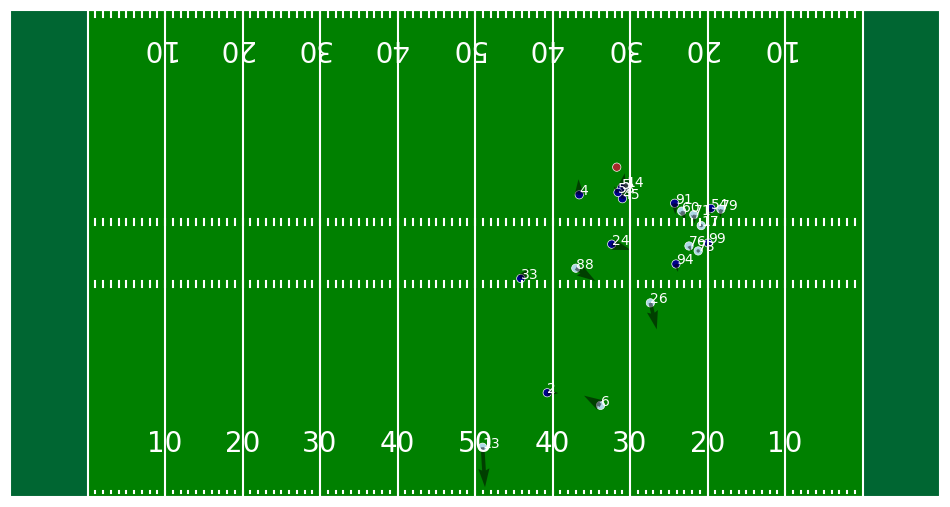

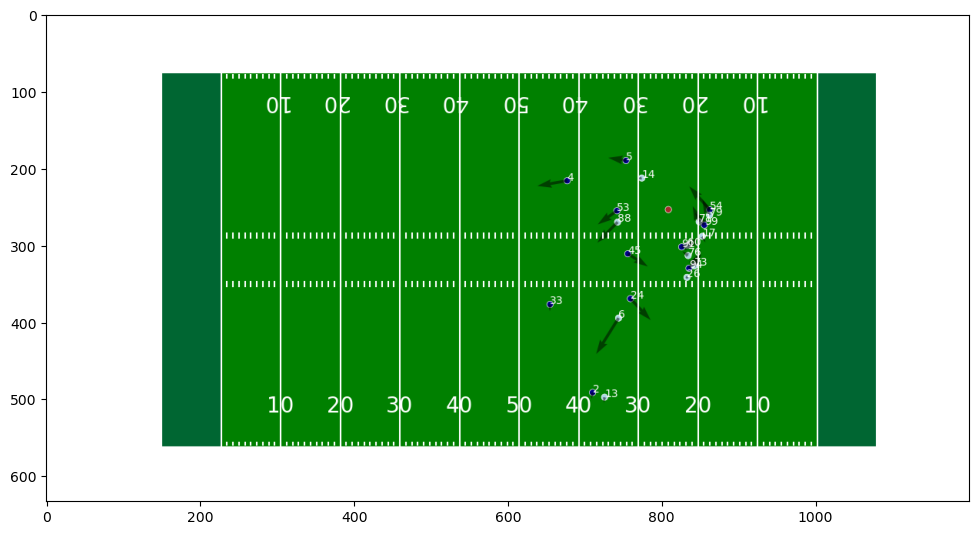

In [16]:
video = []
for i in play_1['frameId'].unique():
    #frame(i, 'o', 'dis')
    #frame(i, 'o', 's')
    #frame(i, 'o', 'a')
    #frame(i, 'dir', 'dis')
    #frame(i, 'dir', 's')
    #frame(i, 'o','s' * 'w')
    frame(i, 'dir', 'a')
    #‘dir’是运动方向，‘o’是朝向
    video.append(Image.open(f'frame_{i}.png'))
fig = plt.figure(figsize=(12, 6.33))
im = plt.imshow(video[0])
def animate_func(i):
    im.set_array(video[i])
    return [im]
anim = animation.FuncAnimation(fig, animate_func, frames = len(video), interval = 1000 // 12)
#plt.show()
anim.save('dir_a.mp4')